# FORDGO BIKE DATA EXPLORATION
## by Akinjiola Oreoluwa Busayo

## Introduction
> This document explores a dataset containing information regarding 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset to be explored
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
#to get the rows and colums in the dataset
df.shape

(183412, 16)

In [5]:
#to get a look at the first five rows in the dataset
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


There are data quality issues such as null values, float values in the member_birth_year and others that will be revealed in the next exploration

In [6]:
#to get information about each of the columns and their structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

This shows that there are null values in some of the columns and columns like start_time, end_time, member_birth_year and some others have an incorrect datatype

### What is the structure of your dataset?

> The dataset contains information on 183,412 bike users with different characteristics across 16 columns. 

### What is/are the main feature(s) of interest in your dataset?

> To figure out the best set of customers to rent bikes to

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the type of user, the gender, the time spent renting the bike, the age of the biker and duration with the bike will help in the investigation of my interest

### Data Wrangling
> The columns that have data quality issues are
1. start_time
2. end_time
3. start_station_id 
4. start_station_name 
5. end_station_id
6. end_station_name 
7. user_type 
8. member_birth_year
9. member_gender
10. bike_share_for_all_trip
11. start_station_latitude
12. start_station_longitude
13. end_station_latitude
14. end_station_longitude

Some of these columns are going to be dropped as they are not needed in acheiving the interest of exploration

In [7]:
# First, Make a copy of the data set
df_clean=df.copy()

In [8]:
#view the dataset and list out the changes to be made
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [9]:
#this is to see the unique values in each of the columns
df_clean.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [10]:
#change the user_type to categorical datatype as there are only 2 unique values which can be used to categorize
#change the bike_share_for_all_trip to categorical datatype as there are only 2 unique values which can be used for grouping
#change the member_gender to categorical datatype as there are only 3 unique values which can be used to categorize
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')
print(df_clean.dtypes)


duration_sec                  int64
start_time                   object
end_time                     object
start_station_id            float64
start_station_name           object
start_station_latitude      float64
start_station_longitude     float64
end_station_id              float64
end_station_name             object
end_station_latitude        float64
end_station_longitude       float64
bike_id                       int64
user_type                  category
member_birth_year           float64
member_gender              category
bike_share_for_all_trip    category
dtype: object


In [11]:
#To check the number of null values in the columns and their percentage
null= pd.DataFrame(df_clean.isnull().sum())
null['percentage'] = round(null/len(df_clean)*100, 2)
null

,0,percentage
duration_sec,0,0.00
start_time,0,0.00
end_time,0,0.00
start_station_id,197,0.11
start_station_name,197,0.11
start_station_latitude,0,0.00
start_station_longitude,0,0.00
end_station_id,197,0.11
end_station_name,197,0.11
end_station_latitude,0,0.00


###### member_birth_year,member_gender have 4.51% of their values missing and start_station_id, start_station_name, end_station_id, end_station_name have 0.11% of their values missing
###### These values are not easily filled so i am going to extract the rows that have all fields complete and use it for the analysis

In [12]:
#to extract the rows that have all their columns complete from the df_clean dataframe
df_filter = df_clean.loc[df_clean.notnull().all(1)].copy()
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             174952 non-null  int64   
 1   start_time               174952 non-null  object  
 2   end_time                 174952 non-null  object  
 3   start_station_id         174952 non-null  float64 
 4   start_station_name       174952 non-null  object  
 5   start_station_latitude   174952 non-null  float64 
 6   start_station_longitude  174952 non-null  float64 
 7   end_station_id           174952 non-null  float64 
 8   end_station_name         174952 non-null  object  
 9   end_station_latitude     174952 non-null  float64 
 10  end_station_longitude    174952 non-null  float64 
 11  bike_id                  174952 non-null  int64   
 12  user_type                174952 non-null  category
 13  member_birth_year        174952 non-null  fl

In [13]:
#split the start_time into date_start and time_start
#split the end_time into date_end and time_end
df_filter[['date_start','time_start']] = df_filter['start_time'].str.split(' ', expand=True)
df_filter[['date_end','time_end']] = df_filter['end_time'].str.split(' ', expand=True)
df_filter.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,date_start,time_start,date_end,time_end
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,17:32:10.1450,2019-03-01,08:01:55.9750
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,12:13:13.2180,2019-03-01,05:24:08.1460
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,17:54:26.0100,2019-03-01,04:02:36.8420
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23:54:18.5490,2019-03-01,00:20:44.0740
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28,23:49:58.6320,2019-03-01,00:19:51.7600


In [14]:
#futher split the date_start and date_end into the month and day by converting it to datetime datatype
df_filter.date_start = pd.to_datetime(df_filter.date_start)
df_filter.date_end = pd.to_datetime(df_filter.date_end)
df_filter['start_month'] = df_filter.date_start.dt.month_name()
df_filter['start_day'] = df_filter.date_start.dt.day_name()
df_filter['end_month'] = df_filter.date_end.dt.month_name()
df_filter['end_day'] = df_filter.date_end.dt.day_name()
df_filter.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,date_start,time_start,date_end,time_end,start_month,start_day,end_month,end_day
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,2019-02-28,17:32:10.1450,2019-03-01,08:01:55.9750,February,Thursday,March,Friday
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,2019-02-28,12:13:13.2180,2019-03-01,05:24:08.1460,February,Thursday,March,Friday
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,2019-02-28,17:54:26.0100,2019-03-01,04:02:36.8420,February,Thursday,March,Friday
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,2019-02-28,23:54:18.5490,2019-03-01,00:20:44.0740,February,Thursday,March,Friday
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,2019-02-28,23:49:58.6320,2019-03-01,00:19:51.7600,February,Thursday,March,Friday


In [15]:
#get the age of the users from the member_birth_year
df_filter['member_birth_year'] = df_filter['member_birth_year'].astype('int')
df_filter['member_age'] = 2019-df_filter['member_birth_year']
df_filter.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,date_start,time_start,date_end,time_end,start_month,start_day,end_month,end_day,member_age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,2019-02-28,17:32:10.1450,2019-03-01,08:01:55.9750,February,Thursday,March,Friday,35
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,No,2019-02-28,12:13:13.2180,2019-03-01,05:24:08.1460,February,Thursday,March,Friday,47
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,No,2019-02-28,17:54:26.0100,2019-03-01,04:02:36.8420,February,Thursday,March,Friday,30
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Yes,2019-02-28,23:54:18.5490,2019-03-01,00:20:44.0740,February,Thursday,March,Friday,45
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,No,2019-02-28,23:49:58.6320,2019-03-01,00:19:51.7600,February,Thursday,March,Friday,60


In [17]:
#drop the columns start_time, end_time, end_station_latitude, end_station_longitude 
#as they are not relevant 
df_filter.drop(['start_time', 'end_time','start_station_latitude', 'start_station_longitude',
               'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df_filter.columns

Index(['duration_sec', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'date_start', 'time_start', 'date_end', 'time_end', 'start_month',
       'start_day', 'end_month', 'end_day', 'member_age'],
      dtype='object')

## Univariate Exploration

#### 1. What are the type of users of the fordgo bike

In [18]:
df_filter.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

Text(0, 0.5, '')

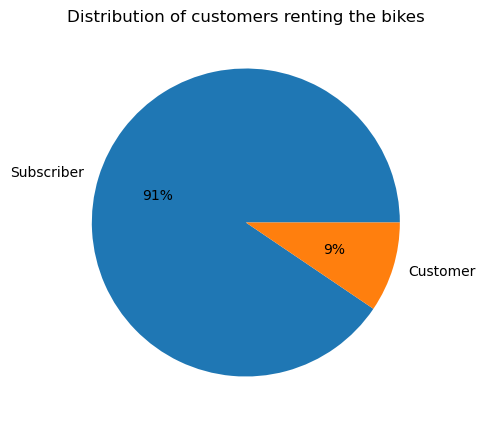

In [19]:
#To visualize the distribution
ax=df_filter['user_type'].value_counts().plot(kind='pie',autopct='%1.0f%%',title='Distribution of customers renting the bikes',
                                          figsize=(5,5))
ax.set_ylabel('')

There are two sets of users of the fordgo bikes in the data set. 91% of the user are Subscribers while 9% are just customers

#### 2. What is the number of the genders that rent the bikes

In [20]:
# To get the value count of each of the genders
df_filter.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

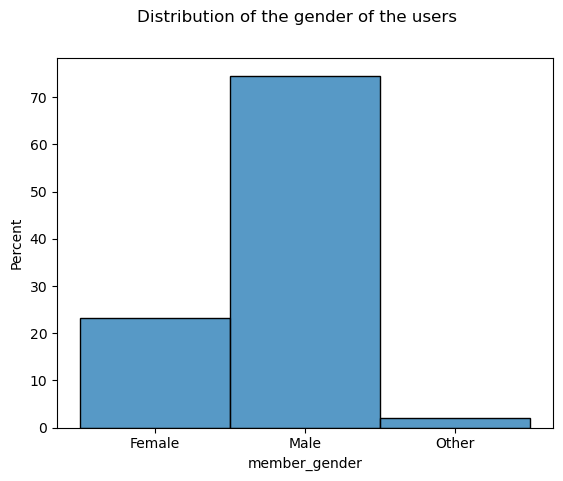

In [24]:
# To visualize the distribution of the genders renting the bikes
sb.histplot(data=df_filter, x="member_gender", stat="percent")
plt.suptitle('Distribution of the gender of the users');

The above chart shows that majority of the bike renters were male with above 120,000 members, between 40,000 and 50,000 were female and others were less that 20,000

#### 3. What month did users rent the most bikes

In [25]:
df_filter.start_month.value_counts()

February    174952
Name: start_month, dtype: int64

Text(0, 0.5, '')

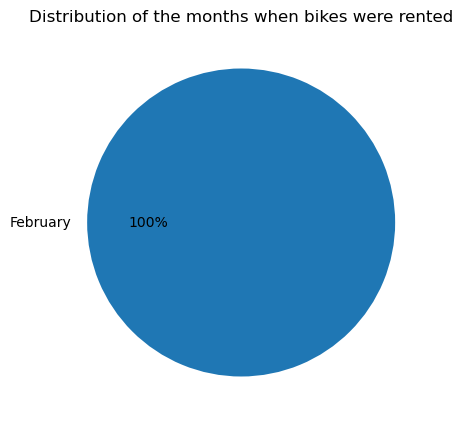

In [26]:
# Visualization on the month the users rented the most bikes 
ax=df_filter['start_month'].value_counts().plot(kind='pie',autopct='%1.0f%%',title='Distribution of the months when bikes were rented',
                                          figsize=(5,5))
ax.set_ylabel('')

The above pie chart shows that this dataset only contains the data of the bikes that were rented in February. This shows that this dataset is only for the bikes rented in February

#### 4. What is the rate of bike rentage per day

In [27]:
df_filter.start_day.value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_day, dtype: int64

Text(0, 0.5, 'Days of the week')

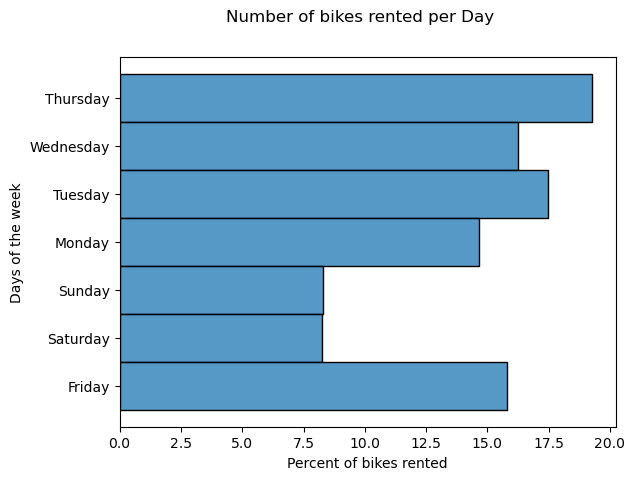

In [30]:
sb.histplot(data=df_filter, y="start_day", stat="percent")
plt.suptitle('Number of bikes rented per Day');
plt.xlabel('Percent of bikes rented')
plt.ylabel('Days of the week')

The above graph shows that majority of the Bikes were rented on Thursday while the least was rented on Saturday

#### 5. In which month were the bikes returned

In [31]:
df_filter.end_month.value_counts()

February    174938
March           14
Name: end_month, dtype: int64

Text(0, 0.5, '')

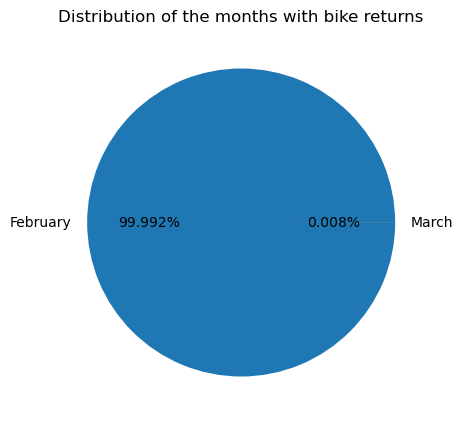

In [32]:
# To visualize the return months
ax=df_filter['end_month'].value_counts().plot(kind='pie',autopct='%0.3f%%',title='Distribution of the months with bike returns',
                                          figsize=(5,5))
ax.set_ylabel('')

The above chary shows that majority of the bikes were returned in the month of February while very few were returned in the month of March. This can be due to some reason which we will explore in this analysis

#### 6. What is the rate of bike returns per day

In [42]:
df_filter.end_day.value_counts()

Thursday     33707
Tuesday      30591
Wednesday    28417
Friday       27655
Monday       25641
Sunday       14519
Saturday     14422
Name: end_day, dtype: int64

Text(0, 0.5, 'Days of the week')

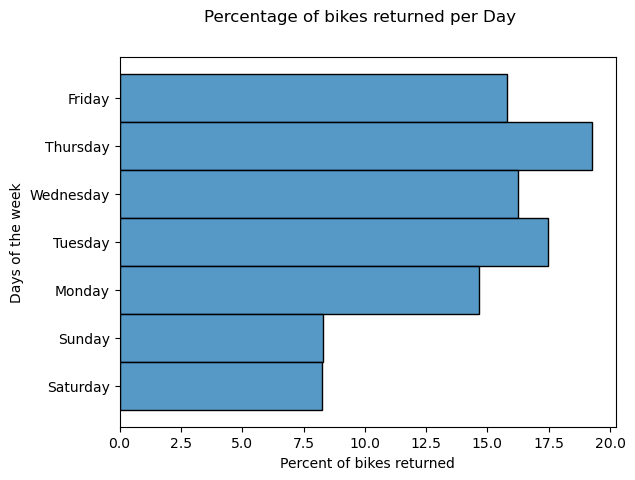

In [33]:
sb.histplot(data=df_filter, y="end_day", stat="percent")
plt.suptitle('Percentage of bikes returned per Day');
plt.xlabel('Percent of bikes returned')
plt.ylabel('Days of the week')

The above graph shows that majority of the Bikes were returned on Thursday while the least was returned on Saturday

#### 7. How many bikes were shared during the renting period?

In [34]:
df_filter.bike_share_for_all_trip.value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

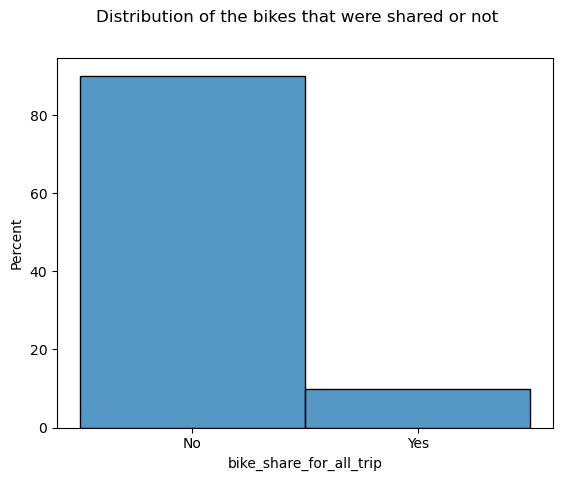

In [35]:
#to visualize the distribution using histplot
sb.histplot(data=df_filter, x="bike_share_for_all_trip",stat="percent")
plt.suptitle('Distribution of the bikes that were shared or not');

#### 7. What is the distribution of the ages of the renters

In [139]:
#creating a grouping for the ages
df_filter['age_groups'] = pd.cut(df_filter['member_age'], [0, 27, 37, 47, 57,141],
                          labels=['18-27', '28-37','38-47','48-57', 'Elderly'])
df_filter.age_groups.value_counts()


28-37      76788
18-27      48176
38-47      30207
48-57      14000
Elderly     5781
Name: age_groups, dtype: int64

In [105]:
df_filter.member_age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

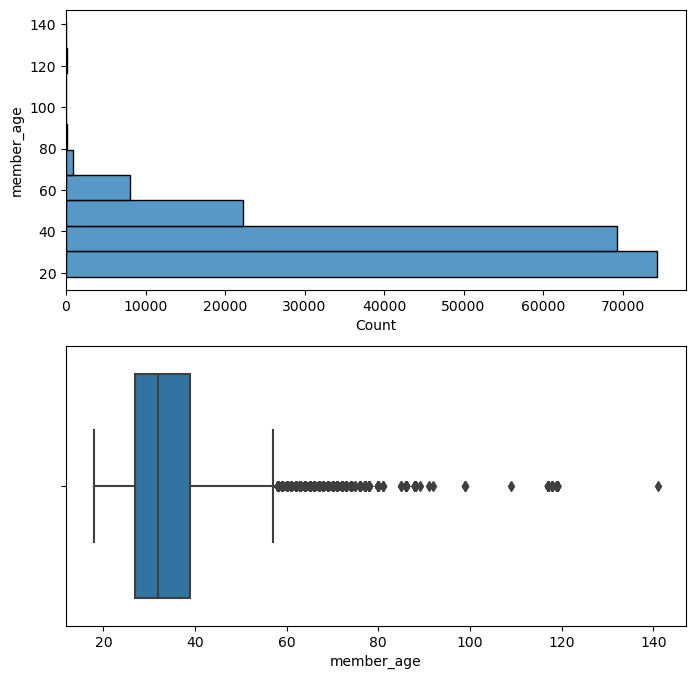

In [103]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.histplot(data = df_filter, y = 'member_age', color = default_color, ax = ax[0], bins=10)
sb.boxplot(data = df_filter, x = 'member_age', color = default_color, ax = ax[1])

plt.show()


#### How many outliers are in the data set based on the ages

In [107]:
def Outliers( data, column ):
    Q3 = np.quantile(data[column], 0.75)
    Q1 = np.quantile(data[column], 0.25)
    lower_boundary = Q1 - 1.5 *(Q3-Q1)
    upper_boundary = Q3 + 1.5 *(Q3-Q1)
    print(f"There are {len(data[data[column] < lower_boundary])} outliers lesser than the lower boundary of {lower_boundary}")
    print(f"There are {len(data[data[column] > upper_boundary])} outliers greater than the upper boundary of {upper_boundary}")
Outliers(df_filter, 'member_age')

There are 0 outliers lesser than the lower boundary of 9.0
There are 5781 outliers greater than the upper boundary of 57.0


In [106]:
round(5781/174952*100, 2)

3.3

The plots of the member age shows that 5781 (3.3%) of the bike renters listed age above 57 are outliers in this dataset. This can be attributed to those above the age of 57 are deemed as elderly.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The startime of the bikes were all in February and all were from Sunday to Saturday. There are 2 types of bike users namely Subscribers and Customers. There are 3 genders stated for the member gender. The end time of the bike rentage were in february and March. I needed too perform some splitting and categorizations. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I expanded the start time to start month and start day for categorization purposes
> I expanded the end time to end month and end day for categorization purposes
> I expanded the member birth year to member age and user age range for categorization purposes

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### 8. What is the distribution of the genders across the age groups

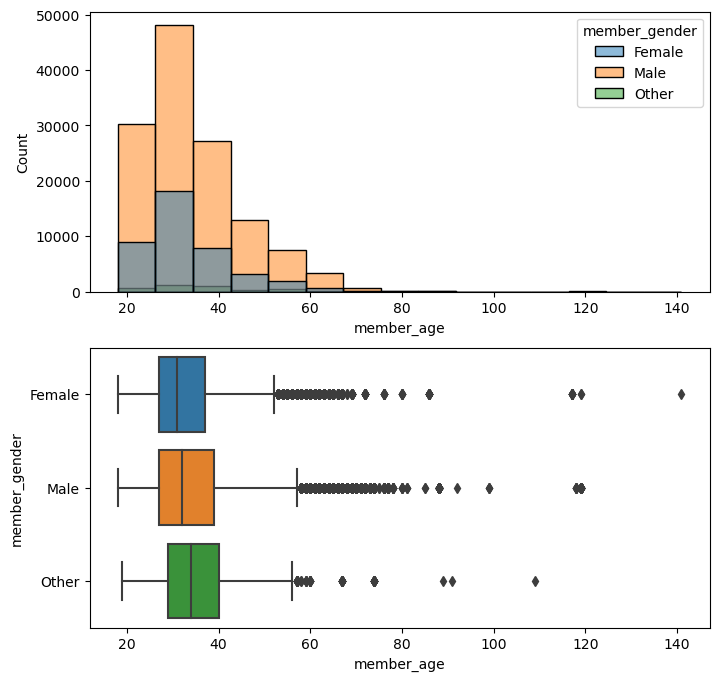

In [127]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

sb.histplot(data = df_filter, x = 'member_age', hue="member_gender", ax = ax[0], bins=15)
sb.boxplot(data= df_filter, x= "member_age", y="member_gender",ax = ax[1])

plt.show()

The barchart shows that the distribution of the genders is consistent across the ages. The male renters are the highest followed by the female and then others.
As discovered earlier there are outliers in this dataset which are from 57 years and above. The box plot shows that there are outlies in all the gender in respect to the age. The highest value and lowest value of the outliers age is a female.


#### 9: What is the relationship between the user gender and the day the bike ride starts?

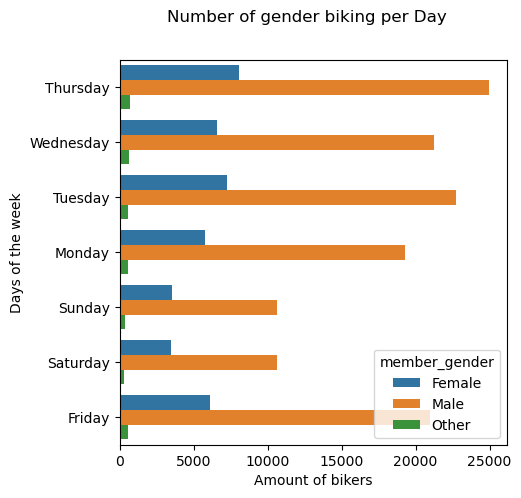

In [132]:
fig, ax = plt.subplots(nrows=1, figsize = [5,5])
sb.countplot(data=df_filter, y= "start_day", hue="member_gender")
plt.suptitle('Number of gender biking per Day');
plt.xlabel('Amount of bikers')
plt.ylabel('Days of the week')
plt.show()


The countplot shows that the distribution of the genders is consistent across the days. The male renters are the highest followed by the female and then others.The graph shows that Majority of the genders go biking on Thursdays and the least go biking on Saturdays

#### 10. What is the average seconds spent biking across the different age groups

<AxesSubplot:xlabel='age_groups', ylabel='duration_sec'>

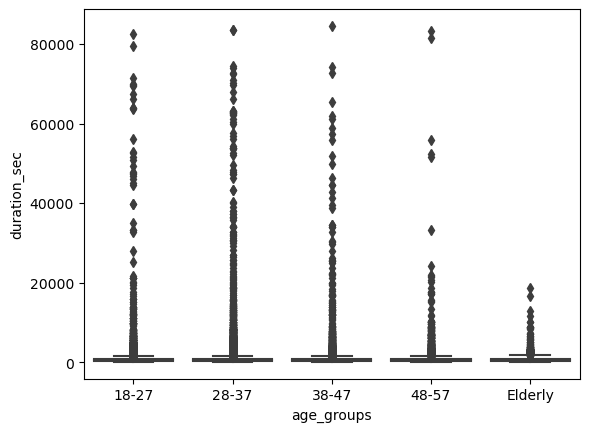

In [188]:
#df_filter.groupby(['age_groups']).mean()['duration_sec'].plot(kind ='bar', title='Average movie popularity by genre');

sb.boxplot(data=df_filter, y='duration_sec', x="age_groups")

The above chart shows that there are some outliers in the age group "others". This can be due to the frequency of occurrence or a error

#### 11. What is the average seconds spent biking across the different genders

<AxesSubplot:xlabel='member_gender', ylabel='duration_sec'>

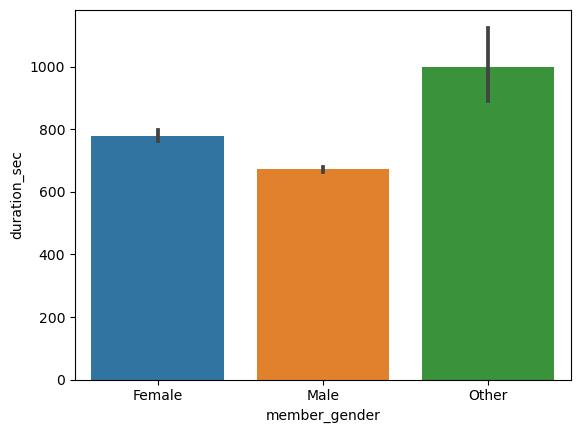

In [170]:
sb.barplot(data=df_filter, y='duration_sec', x="member_gender")

The above graph shows the distribution of the time spent by each gender. The other gender spent more average time than the female and the females than the male users

#### 12. What is the distribution of the bike usertype across the genders

<AxesSubplot:xlabel='count', ylabel='user_type'>

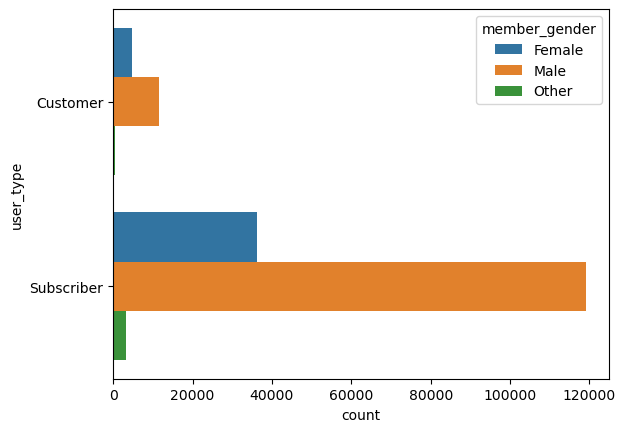

In [175]:
sb.countplot(data=df_filter, y='user_type', hue="member_gender")

The above graph shows that the higher number of customers and subscribers are males while the least number is others

#### 13. What is the age range in the Customer and Subscribers

<AxesSubplot:xlabel='user_type', ylabel='count'>

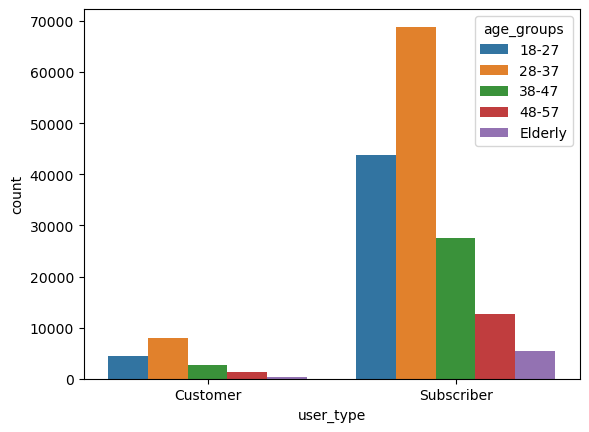

In [190]:
sb.countplot(data=df_filter, x='user_type', hue="age_groups")

The above chart shows that bikers between the ages of 28-37 are the most frequent as customers and Subscribers. While the elderly are the least Customers and Subscribers

#### 14. What month did the age groups return the bikes

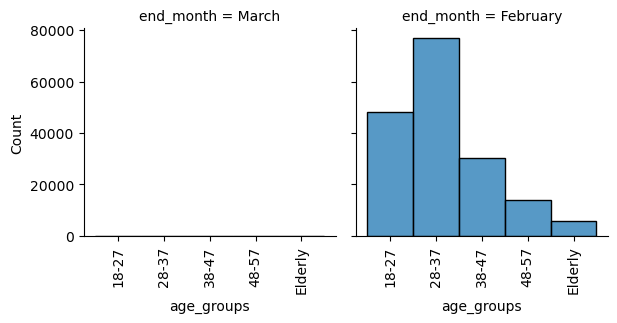

In [205]:
#sb.histplot(data=df_filter, x='age_groups', hue="end_month")
g = sb.FacetGrid(df_filter, col="end_month", height=3, col_wrap=3)
g.map_dataframe(sb.histplot, x="age_groups")
g.set_xticklabels(rotation=90);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There were interesting relationships between the features. The distribution across the different genders and age groups bring out some insights about the members who rent bikes. There are also outliers in the renters age in this dataset

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The average time spent by the elderly is the highest of which since they are outliers this might be an error or they too their time in returning the bikes which in resulted in the higher average time spent

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### 13. What is the relationship between the user_gender, the age group and the time spent?

<AxesSubplot:xlabel='duration_sec', ylabel='age_groups'>

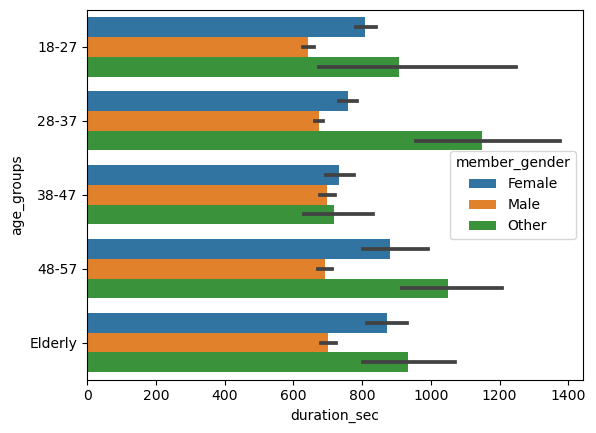

In [210]:
sb.barplot(data=df_filter, x="duration_sec", y="age_groups", hue="member_gender")

The above chart shows that the other gender which are between the ages of 28-37 spend the most time biking. The male spens the least time biking across all the ages

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The difference in the time spent by each of the different genders are large 
### Were there any interesting or surprising interactions between features?

> I expected that the males will be the ones to spend the most time biking but it seems that it is not so

## Conclusions
The data set had a number of columns with null values that had to be put aside for the analysis. There were outliers in the age of the bikers which suggested that the some of the ages imputed were not correct and if correct they were in the elderly category

In [ ]:
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.boxplot.html
https://datascientyst.com/get-top-10-highest-lowest-values-pandas/
https://stackoverflow.com/
https://github.com/